In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

In [3]:
RAW_DIR = Path("C:/IP/greenmlops/data/raw/fraud")
OUT_DIR = Path("C:/IP/greenmlops/data/processed/fraud")
OUT_DIR.mkdir(parents=True, exist_ok=True)

In [4]:

df = pd.read_csv(RAW_DIR / "creditcard.csv")

print(f"Shape   : {df.shape}")
print(f"Columns : {df.columns.tolist()}")

Shape   : (284807, 31)
Columns : ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class']


In [5]:
print(df.dtypes)

print(df.head(3))

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  

In [6]:
print(df.isnull().sum())

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [7]:
df.describe().T[["mean", "std", "min", "max"]].round(4)

,mean,std,min,max
Time,94813.8596,47488.1460,0.0000,172792.0000
V1,0.0000,1.9587,-56.4075,2.4549
V2,0.0000,1.6513,-72.7157,22.0577
V3,-0.0000,1.5163,-48.3256,9.3826
V4,0.0000,1.4159,-5.6832,16.8753
V5,0.0000,1.3802,-113.7433,34.8017
V6,0.0000,1.3323,-26.1605,73.3016
V7,-0.0000,1.2371,-43.5572,120.5895
V8,0.0000,1.1944,-73.2167,20.0072
V9,-0.0000,1.0986,-13.4341,15.5950


In [8]:
counts = df["Class"].value_counts().sort_index()
print(f"Legit (0)  : {counts[0]}")
print(f"Fraud (1)  : {counts[1]}")
print(f"Fraud ratio: {counts[1] / len(df) * 100:.4f}%")

Legit (0)  : 284315
Fraud (1)  : 492
Fraud ratio: 0.1727%


### Plots

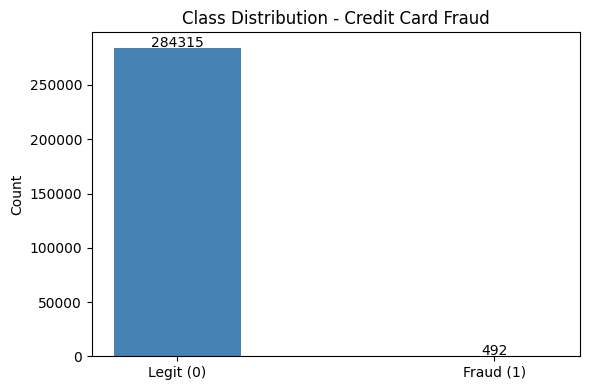

In [9]:
fig, ax = plt.subplots(figsize=(6, 4))
ax.bar(["Legit (0)", "Fraud (1)"], [counts[0], counts[1]], color=["steelblue", "crimson"], width=0.4)
ax.set_title("Class Distribution - Credit Card Fraud")
ax.set_ylabel("Count")
for i, v in enumerate([counts[0], counts[1]]):
    ax.text(i, v + 500, str(v), ha="center", fontsize=10)
plt.tight_layout()
plt.savefig(OUT_DIR / "class_distribution.png", dpi=150)
plt.show()

In [10]:
print("=== AMOUNT STATS ===")
print(df["Amount"].describe().round(4))
print(f"\nMax amount  : {df['Amount'].max()}")
print(f"Zero amount : {(df['Amount'] == 0).sum()}")

=== AMOUNT STATS ===
count    284807.0000
mean         88.3496
std         250.1201
min           0.0000
25%           5.6000
50%          22.0000
75%          77.1650
max       25691.1600
Name: Amount, dtype: float64

Max amount  : 25691.16
Zero amount : 1825


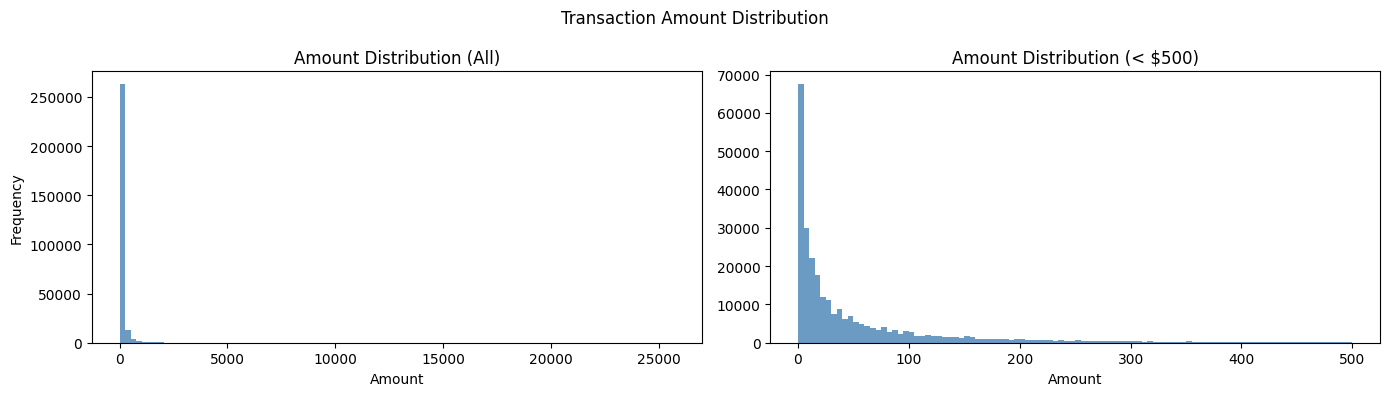

In [11]:
fig, axes = plt.subplots(1, 2, figsize=(14, 4))

axes[0].hist(df["Amount"], bins=100, color="steelblue", alpha=0.8)
axes[0].set_title("Amount Distribution (All)")
axes[0].set_xlabel("Amount")
axes[0].set_ylabel("Frequency")

axes[1].hist(df[df["Amount"] < 500]["Amount"], bins=100, color="steelblue", alpha=0.8)
axes[1].set_title("Amount Distribution (< $500)")
axes[1].set_xlabel("Amount")

plt.suptitle("Transaction Amount Distribution")
plt.tight_layout()
plt.savefig(OUT_DIR / "amount_distribution.png", dpi=150)
plt.show()

In [12]:
print("=== TIME STATS (seconds) ===")
print(df["Time"].describe().round(2))
print(f"\nTime range in hours: {df['Time'].max() / 3600:.1f} hours")

df["hour"] = (df["Time"] // 3600) % 24

=== TIME STATS (seconds) ===
count    284807.00
mean      94813.86
std       47488.15
min           0.00
25%       54201.50
50%       84692.00
75%      139320.50
max      172792.00
Name: Time, dtype: float64

Time range in hours: 48.0 hours


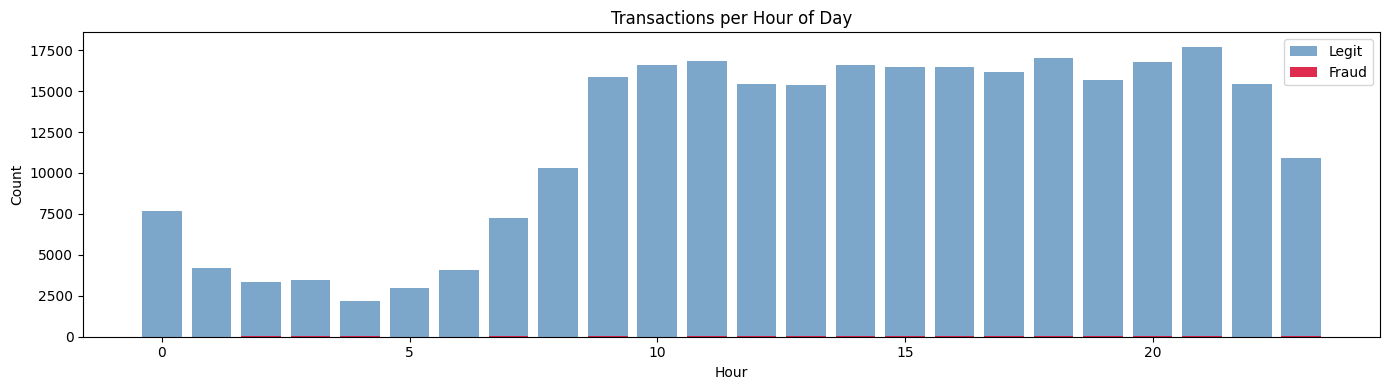

In [13]:
fig, ax = plt.subplots(figsize=(14, 4))
hourly = df.groupby("hour")["Class"].agg(["count", "sum"])
hourly.columns = ["total", "fraud"]

ax.bar(hourly.index, hourly["total"], color="steelblue", alpha=0.7, label="Legit")
ax.bar(hourly.index, hourly["fraud"], color="crimson", alpha=0.9, label="Fraud")
ax.set_title("Transactions per Hour of Day")
ax.set_xlabel("Hour")
ax.set_ylabel("Count")
ax.legend()
plt.tight_layout()
plt.savefig(OUT_DIR / "transactions_per_hour.png", dpi=150)
plt.show()

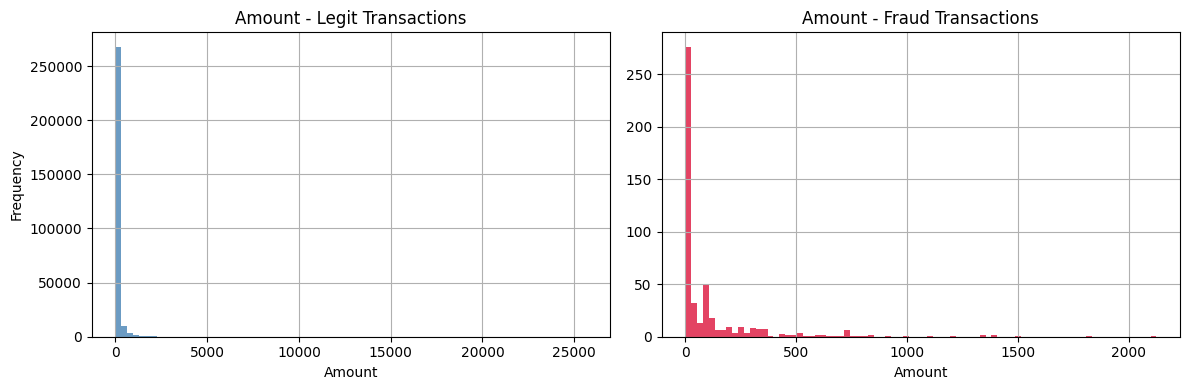

In [14]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

df[df["Class"] == 0]["Amount"].hist(bins=80, ax=axes[0], color="steelblue", alpha=0.8)
axes[0].set_title("Amount - Legit Transactions")
axes[0].set_xlabel("Amount")
axes[0].set_ylabel("Frequency")

df[df["Class"] == 1]["Amount"].hist(bins=80, ax=axes[1], color="crimson", alpha=0.8)
axes[1].set_title("Amount - Fraud Transactions")
axes[1].set_xlabel("Amount")

plt.tight_layout()
plt.savefig(OUT_DIR / "amount_by_class.png", dpi=150)
plt.show()

In [15]:
Q1  = df["Amount"].quantile(0.25)
Q3  = df["Amount"].quantile(0.75)
IQR = Q3 - Q1

outliers = ((df["Amount"] < Q1 - 3*IQR) | (df["Amount"] > Q3 + 3*IQR)).sum()
print(f"Amount outliers (3*IQR): {outliers}")

Amount outliers (3*IQR): 18941


### Clean

In [16]:
df_clean = df.copy()

# scale Amount with log1p - standard for fraud datasets
df_clean["Amount"] = np.log1p(df_clean["Amount"])

# drop Time and temp hour column - not useful as raw seconds
df_clean = df_clean.drop(columns=["Time", "hour"])

# verify
assert df_clean.isnull().sum().sum() == 0, "Nulls remain"

df_clean.to_csv(OUT_DIR / "creditcard_clean.csv", index=False)

print(f"Clean shape : {df_clean.shape}")
print(f"Saved to    : {OUT_DIR}/creditcard_clean.csv")

Clean shape : (284807, 30)
Saved to    : C:\IP\greenmlops\data\processed\fraud/creditcard_clean.csv
